In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Path to files
# https://www.kaggle.com/usdot/flight-delays
airlines_path = "Datasets/airlines.csv"
airport_path = "Datasets/airports.csv"
flights_path = "Datasets/flights.csv"

# Load data
airlines_data = pd.read_csv(airlines_path)
airport_data = pd.read_csv(airport_path)
flights_data = pd.read_csv(flights_path)

C:\Users\Suma Marri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
airlines_data
airlines_data.shape

(14, 2)

In [5]:
airport_data.head()
airport_data.shape

(322, 7)

In [6]:
# Airports without lat/lon
airport_data.isnull().sum()
airport_data[airport_data.isnull().any(axis=1)]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,NaN,NaN
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN


In [7]:
flights_data.shape

(5819079, 31)

In [8]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


CANCELLED
0    5729195
1      89884
Name: FLIGHT_NUMBER, dtype: int64


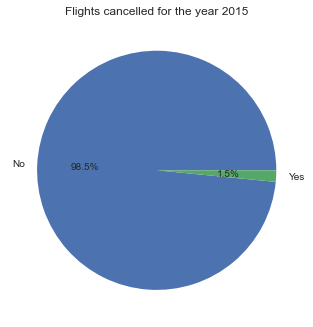

In [9]:
plt.style.use('seaborn')
labels = ['No', 'Yes']
print(flights_data.groupby('CANCELLED').count()['FLIGHT_NUMBER'])
plt.pie(x=flights_data.groupby('CANCELLED').count()['FLIGHT_NUMBER'], autopct='%1.1f%%',labels=labels)
plt.title("Flights cancelled for the year 2015")
plt.show()

CANCELLATION_REASON
A    25262
B    48851
C    15749
D       22
Name: FLIGHT_NUMBER, dtype: int64


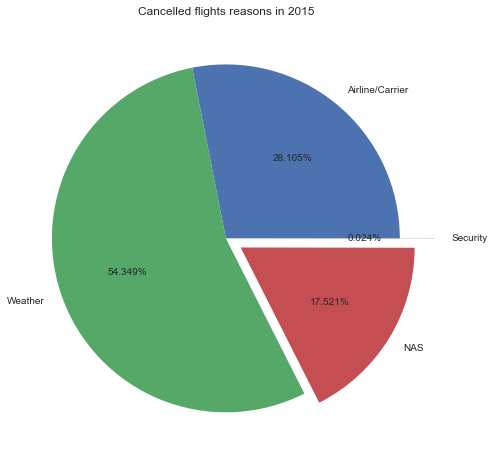

In [10]:
# Flights cancelled
flights_cancelled = flights_data.loc[flights_data['CANCELLED'] == 1]
print(flights_cancelled.groupby('CANCELLATION_REASON').count()['FLIGHT_NUMBER'])
# labels = {'A':'Airline/Carrier', 'B':'Weather', 'C':'NAS', 'D':'Security'}
labels = ['Airline/Carrier', 'Weather', 'NAS', 'Security']
plt.figure(figsize=(15,8))
plt.pie(x=flights_cancelled.groupby('CANCELLATION_REASON').count()['FLIGHT_NUMBER'], autopct='%1.3f%%',labels=labels,  explode = (0,0,0.1,0.2))
plt.title("Cancelled flights reasons in 2015")
plt.show()

We will drop columns with null values.

In [11]:
flights_data.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [12]:
# print the percentage null values in columns
def get_null_data(data):
    
    '''Function prints the % of nulls in null columns.'''
    
    total_rows = data.shape[0]
    print("==== TOTAL NUMBER OF ROWS : {} ====".format(total_rows))
    print()
    for col in data.columns:
        null_values = data[col].isnull().sum()
        if null_values > 0:
            perc_null_val = float(null_values)*100/total_rows
            print("{} column has {:.2f}% null values".format(col, perc_null_val))
            

# Call the function
get_null_data(flights_data)

==== TOTAL NUMBER OF ROWS : 5819079 ====

TAIL_NUMBER column has 0.25% null values
DEPARTURE_TIME column has 1.48% null values
DEPARTURE_DELAY column has 1.48% null values
TAXI_OUT column has 1.53% null values
WHEELS_OFF column has 1.53% null values
SCHEDULED_TIME column has 0.00% null values
ELAPSED_TIME column has 1.81% null values
AIR_TIME column has 1.81% null values
WHEELS_ON column has 1.59% null values
TAXI_IN column has 1.59% null values
ARRIVAL_TIME column has 1.59% null values
ARRIVAL_DELAY column has 1.81% null values
CANCELLATION_REASON column has 98.46% null values
AIR_SYSTEM_DELAY column has 81.72% null values
SECURITY_DELAY column has 81.72% null values
AIRLINE_DELAY column has 81.72% null values
LATE_AIRCRAFT_DELAY column has 81.72% null values
WEATHER_DELAY column has 81.72% null values


In [13]:
columns_to_drop = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
flights_data.drop(columns_to_drop, axis=1, inplace=True)

Since, rest of the null values are very lest ~2%, it is better to drop these rows. 
But still to be sure, we can check the information loss.

In [15]:
rows_after_dropping_null = flights_data.dropna(axis=0).shape[0]
rows_before_dropping_null = flights_data.shape[0]

perc_info_loss = (rows_before_dropping_null - rows_after_dropping_null)*100/rows_before_dropping_null
print("Percentage information loss after dropping null values is {:.3f}%".format(perc_info_loss))

Percentage information loss after dropping null values is 1.806%


In [16]:
flights_data.dropna(axis=0, inplace=True)

In [17]:
# Check null values again
get_null_data(flights_data)

==== TOTAL NUMBER OF ROWS : 5714008 ====



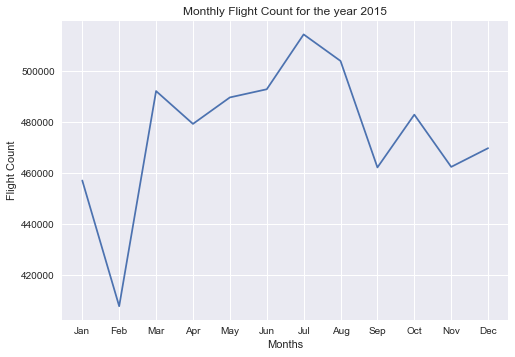

In [18]:
# plot the monthly data
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
flights_data.groupby('MONTH').count()['FLIGHT_NUMBER'].plot()
plt.xlabel("Months")
plt.xticks(labels=labels, ticks=np.arange(1,13,1))
plt.ylabel("Flight Count")
plt.title("Monthly Flight Count for the year 2015")
plt.show()

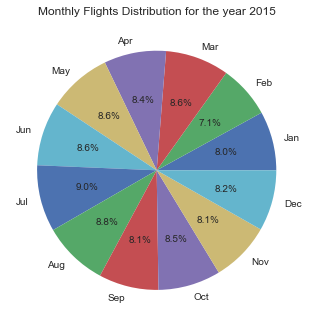

In [19]:
# plot the month distribution on a pie chart
plt.pie(x=flights_data.groupby('MONTH').count()['FLIGHT_NUMBER'], autopct='%1.1f%%', labels=labels)
plt.title("Monthly Flights Distribution for the year 2015")
plt.show()

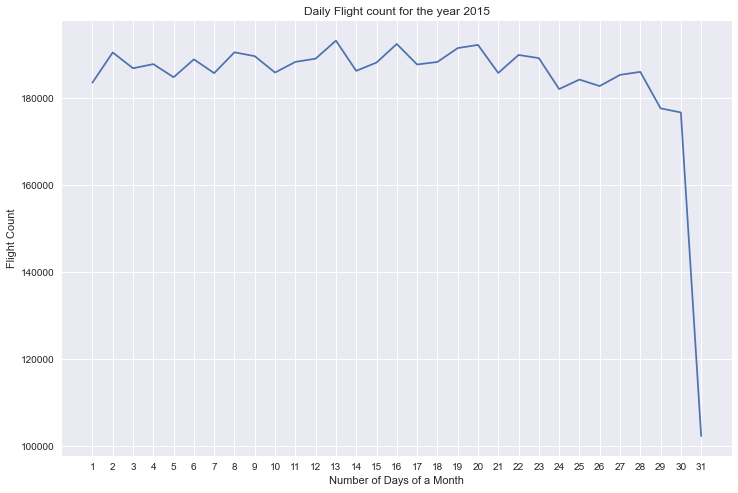

In [20]:
# Plot the daily flight data for the year 2015
flights_data.groupby('DAY').count()['AIRLINE'].plot(figsize=(12,8))
plt.xlabel("Number of Days of a Month")
plt.xticks(np.arange(1, 32, 1))
plt.ylabel("Flight Count")
plt.title("Daily Flight count for the year 2015")
plt.show()

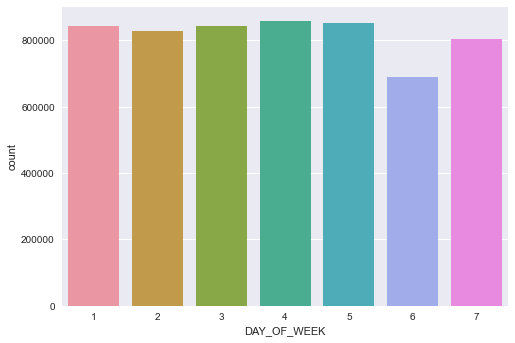

In [21]:
# plot the distribution of flights across DAY_OF_WEEK
sns.countplot(data=flights_data, x='DAY_OF_WEEK')
plt.show()

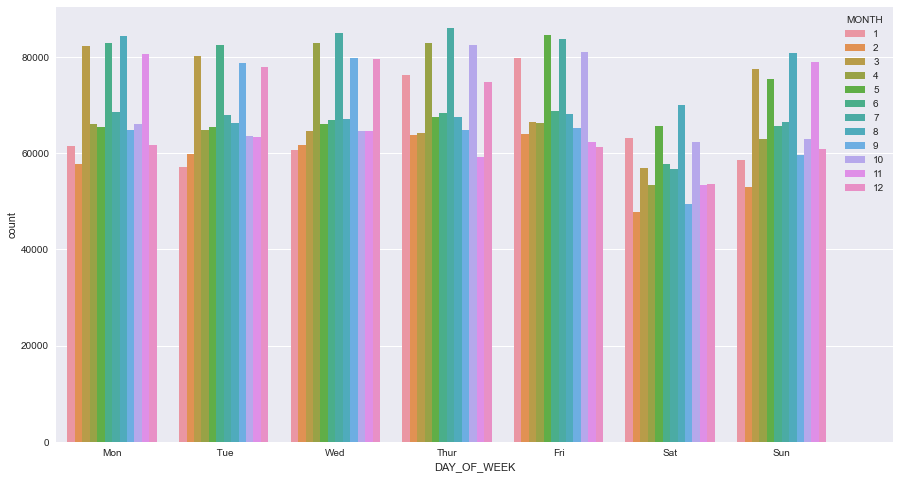

In [22]:
# plot the distribution of flights across DAY_OF_WEEK for each Month
day_labels = ['Mon',' Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun', '']
plt.figure(figsize=(15,8))
sns.countplot(data=flights_data, x='DAY_OF_WEEK', hue='MONTH')
plt.xticks(labels=day_labels, ticks=np.arange(0,8,1))
plt.show()

In [23]:
# Merge flights_data with airlines_data
flights_data = pd.merge(left = flights_data, right = airlines_data, left_on='AIRLINE', right_on='IATA_CODE').rename(columns={'AIRLINE_y' : 'AIRLINE'})

In [24]:
flights_data.drop('AIRLINE_x', axis=1, inplace=True)

In [25]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,IATA_CODE,AIRLINE
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,1448,404.0,4.0,430,408.0,-22.0,0,0,AS,Alaska Airlines Inc.
1,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,1448,254.0,5.0,320,259.0,-21.0,0,0,AS,Alaska Airlines Inc.
2,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,1448,451.0,4.0,509,455.0,-14.0,0,0,AS,Alaska Airlines Inc.
3,2015,1,1,4,122,N413AS,ANC,PDX,50,46.0,...,1542,504.0,3.0,525,507.0,-18.0,0,0,AS,Alaska Airlines Inc.
4,2015,1,1,4,130,N457AS,FAI,SEA,115,107.0,...,1533,538.0,7.0,548,545.0,-3.0,0,0,AS,Alaska Airlines Inc.


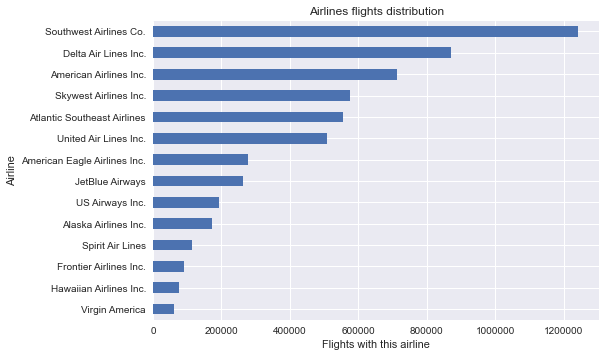

In [26]:
# Plot the AIRLINE count distribution
flights_data['AIRLINE'].value_counts().sort_values().plot(kind='barh')
plt.ticklabel_format(axis="x", style='plain')
plt.ylabel("Airline")
plt.xlabel("Flights with this airline")
plt.title("Airlines flights distribution")
plt.show()

In [1]:
airlines_labels = list(flights_data['AIRLINE'].value_counts().index)
plt.figure(figsize=(15,8))
plt.pie(flights_data['AIRLINE'].value_counts(), autopct = '%1.1f%%', labels = airlines_labels, explode = (0,0,0,0,0,0,0,0,0,0.05,0.1,0.2,0.3,0.3))
plt.title("Airlines flights distribution")
plt.show()

NameError: name 'flights_data' is not defined